<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/MN2022_1_AjusteNolineal__Clase_09u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Presentación Clase

**Nombres:** 

Esteban Velilla H.

Jaime A. Valencia V.


**Email:**

esteban.velilla@udea.edu.co

jalejandro.valencia@udea.edu.co


**Curso:**
Métodos numéricos 2022-1

**Fecha:**
Martes 2022-juno-21

# Descripción

**Objetivos**

Presentación ajuste No lineal de datos usando curve_fit y minimize de scipy.


**Desarrollo**



1.   Ajuste Funcion senoidal
2.   Ajuste senoidal con nivel DC



# Modulos principales

Importacion de modulo principales de trabajo en Metodos Numericos.

In [1]:
import pylab as plt
import matplotlib
import numpy as np
import scipy as SC
import sympy as SP

Observacion de las versiones de los modulos importados.

In [ ]:
print("Version numpy: ",np.__version__)
print("Version Matplotlib: ",matplotlib.__version__)
print("Version scipy: ", SC.__version__)
print("Version sympy: ",  SP.__version__)

Version numpy:  1.21.6
Version Matplotlib:  3.2.2
Version scipy:  1.4.1
Version sympy:  1.7.1


# Ajuste Funcion senoidal

In [5]:
##funciones especificas a importar
from scipy.optimize import curve_fit
from scipy.optimize import minimize

#funciones a programar segun el problema

def F_ajuste01(x,A_max, Freq, Desf):
    """ f(x) modelo que depende de los parametros
        A_max, Freq, Des
        f(x) = A_max*np.cos(wo*x + Desf)
    """
    wo = 2*np.pi*Freq
    
    y = A_max*np.cos(wo*x + Desf)
    return y

def F_error01(X, x_data, y_data):
    """funcion de error 
    """
    A_max1, Freq1, Desf1 = X
    f_modelo = F_ajuste01( x_data,A_max1, Freq1, Desf1)#evaluacion modelo
    
    er1 = (np.array(y_data)-f_modelo)**2
    error = sum(er1)/len(x_data)#Error cuadratico medio
    return error


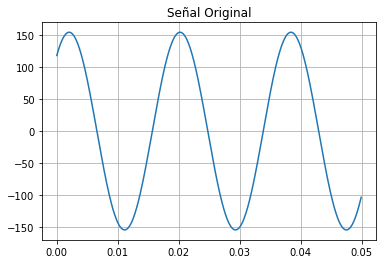

Parametros Curve_fit[A, freq, desf]:  [155.          55.          80.98140899]
Param minimize() [A, freq, desf]:  [155.0000001   55.00000011  -0.70000002]
Param Originales [A, freq, desf]:  [155, 55, -0.7]


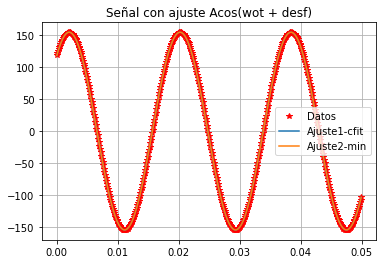

In [18]:
#datos de prueba
t_x = np.arange(0,0.05,1e-4)

P_orig = [155, 55, -0.7]

freq = P_orig[1] #Hertz
wo = 2*np.pi*freq

Dteta = P_orig[2] # desface en radianes
f_y = F_ajuste01(t_x,*P_orig)

plt.plot(t_x,f_y)
plt.title("Señal Original")
plt.grid("on")
plt.show()

#ajuste de curva usando scipy.optimize.curve_fit

param,param_cov = curve_fit(F_ajuste01, t_x, f_y)
print("Parametros Curve_fit[A, freq, desf]: ",param)

#ajuste usando minimiza
X0 = [100,40,0.1]
Res1 = minimize(F_error01, X0 ,(t_x, f_y))
print("Param minimize() [A, freq, desf]: ", Res1.x)

print("Param Originales [A, freq, desf]: ", P_orig)

f_ajuste1 = F_ajuste01(t_x,*param)
f_ajuste2 = F_ajuste01(t_x, *Res1.x)


plt.plot(t_x,f_y,"r*")
plt.plot(t_x,f_ajuste1)
plt.plot(t_x,f_ajuste2)
plt.title("Señal con ajuste Acos(wot + desf)")
plt.grid("on")
plt.legend(["Datos","Ajuste1-cfit","Ajuste2-min"])
plt.show()



# Ajuste senoidal con nivel DC

In [13]:
#funciones a programar segun el problema

def F_ajuste02(x,A_max, Freq, Desf, Vdc):
    """ f(x) modelo que depende de los parametros
        A_max, Freq, Desf, Vdc
        f(x) = Vdc + A_max*np.cos(wo*x + Desf)
    """
    wo = 2*np.pi*Freq
    
    y = Vdc + A_max*np.cos(wo*x + Desf)
    return y

def F_error02(X, x_data, y_data):
    """funcion de error 
    """
    A_max1, Freq1, Desf1, Vdc1 = X
    f_modelo = F_ajuste02(x_data,A_max1, Freq1, Desf1, Vdc1)#evaluacion modelo
    
    er1 = (np.array(y_data)-f_modelo)**2
    error = sum(er1)/len(x_data)#Error cuadratico medio
    return error

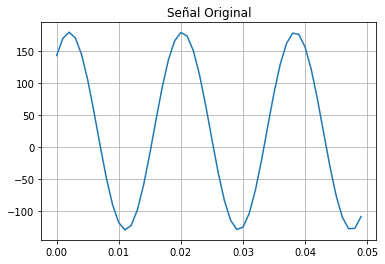

Parametros [A, freq, desf, Vdc]:  [41.03496084 27.62086972 -5.87178709 25.6801666 ]
Param minimize() [A, freq, desf, Vdc]:  [155.00000006  55.00000013  -0.70000003  24.99999992]
Param Originales [A, freq, desf, Vdc]:  [155, 55, -0.7, 25]


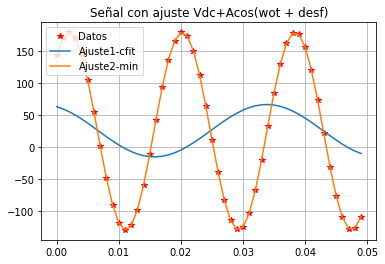

In [16]:
#datos de prueba
t_x2 = np.arange(0,0.05,1e-3)

P_orig2 = [155, 55, -0.7, 25]

#freq = P_orig[1] #Hertz
#wo = 2*np.pi*freq
#Dteta = P_orig[2] # desface en radianes

f_y2 = F_ajuste02(t_x2,*P_orig2)

plt.plot(t_x2,f_y2)
plt.title("Señal Original")
plt.grid("on")
plt.show()

#ajuste de curva usando scipy.optimize.curve_fit

####NO AJUSTA BIEN CURVE_FIT ????????????
param2,param_cov2 = curve_fit(F_ajuste02, t_x2, f_y2)
print("Parametros [A, freq, desf, Vdc]: ",param2)

#ajuste usando minimiza
X02 = [100,40,0.1, 0]
Res2 = minimize(F_error02, X02 ,(t_x2, f_y2))
print("Param minimize() [A, freq, desf, Vdc]: ", Res2.x)

print("Param Originales [A, freq, desf, Vdc]: ", P_orig2)

f_ajuste12 = F_ajuste02(t_x2,*param2)
f_ajuste22 = F_ajuste02(t_x2, *Res2.x)


plt.plot(t_x2,f_y2,"r*")
plt.plot(t_x2,f_ajuste12)
plt.plot(t_x2,f_ajuste22)
plt.title("Señal con ajuste Vdc+Acos(wot + desf)")
plt.grid("on")
plt.legend(["Datos","Ajuste1-cfit","Ajuste2-min"])
plt.show()



# Resultados y conclusiones

**Conclusiones:**



**Resultados:**

**Referencias:**



*Libros*

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. Introd.](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/intro.pdf)

[Burde & Faires](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)





[scipy-interpolate 1.8.1](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html#)  [1.4.1](https://docs.scipy.org/doc/scipy-1.4.1/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

[2017-marzo-15 Prezi](http://numericalmethodsie20152udea.blogspot.com/2017/03/interpolacion-ajuste-y-procesamieto-de.html)

[Guia Burden y Chapra](http://numericalmethodsie20152udea.blogspot.com/2017/03/documentacion-interpolacion-y-ajuste.html)

[2016-sep-14](http://numericalmethodsie20152udea.blogspot.com/2016/09/ajuste-de-funcion-no-lineal.html)

[2016-sep-7](http://numericalmethodsie20152udea.blogspot.com/2016/09/interpolacion-y-ajuste-de-datos.html)